# Recovering time-independent Hamiltonian from the wavefunction as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from split_op_schrodinger1D import SplitOpSchrodinger1D
from imag_time_propagation import ImgTimePropagation
from recovering_hamiltonian import RecoverHamiltonian

In [2]:
# Changing the default size of all the figures 
plt.rcParams['figure.figsize'] = [15, 8]

# Use the evolution generated by the time-independent Hamiltonian as input

## propagate to get the input

In [3]:
# parameters of the quantum system to be studied
@njit
def v(x, t=0.):
    """
    Potential energy
    """
    return 0.02 * x ** 4
    
@njit
def k(p, t=0.):
    """
    Non-relativistic kinetic energy
    """
    return 0.5 * p ** 2

quant_sys_params = dict(
    dt = 0.008,
    x_grid_dim=512,
    x_amplitude=10.,
    k=k,
    v=v,
)

In [4]:
# initialize the propagator
quant_sys = SplitOpSchrodinger1D(**quant_sys_params)

# set the initial condition that is not an eigenstate
quant_sys.set_wavefunction(
    lambda x: np.exp(-0.4 * (x + 2.5) ** 2)
)

# Save the evolution
wavefunctions = [quant_sys.propagate().copy() for _ in range(10000)]
wavefunctions = np.array(wavefunctions)



## Reconstruct Hamiltonian

In [5]:
reconstructed_h = RecoverHamiltonian(wavefunctions, dt=quant_sys.dt)
times = quant_sys.dt * np.arange(len(wavefunctions))
reconstructed_wavefunctions = reconstructed_h.propagate(times)

In [6]:
reconstructed_h.weight.max()

1.0

In [7]:
indx = np.nonzero(reconstructed_h.weight > 1e-3)

(-6, 60)

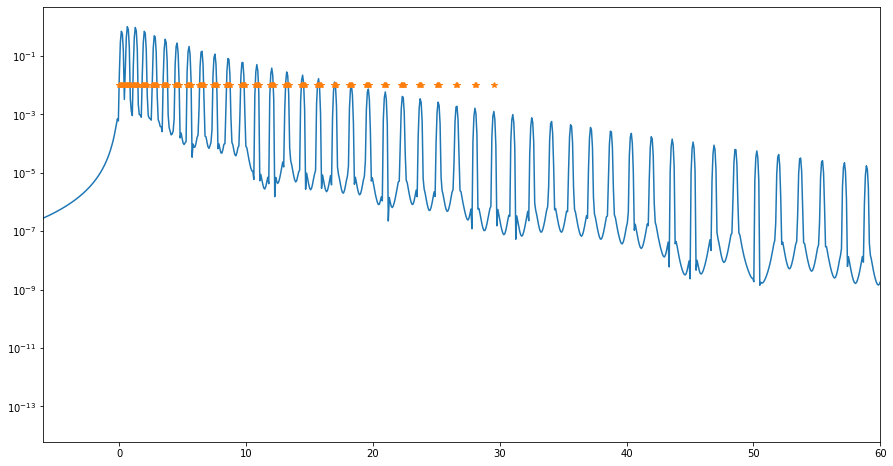

In [8]:
plt.semilogy(reconstructed_h.energy_range, reconstructed_h.weight)
plt.semilogy(reconstructed_h.energies, 1e-2 * np.ones(reconstructed_h.energies.size), '*')#reconstructed_h.weight[indx], '*')
plt.xlim(-6, 60)

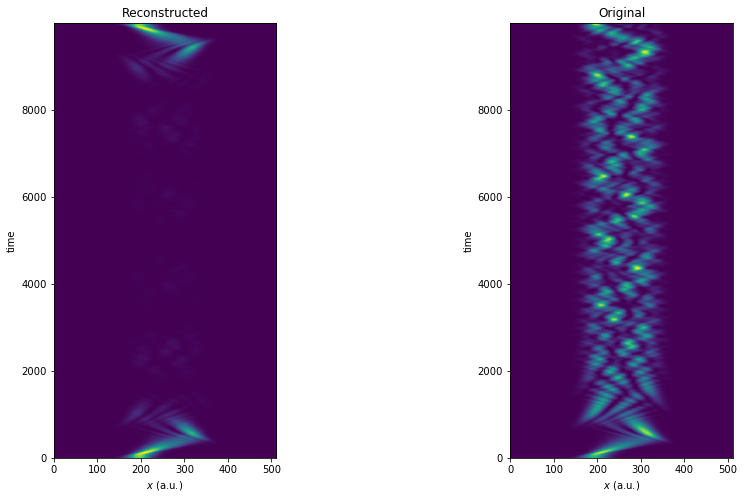

In [9]:
plt.subplot(121)

plt.title('Reconstructed')
plt.imshow(np.abs(reconstructed_wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.subplot(122)
plt.title('Original')
plt.imshow(np.abs(wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.show()

In [10]:
reconstructed_h.energies

array([ 0.        ,  0.07853982,  0.15707963,  0.23561945,  0.31415927,
        0.39269908,  0.4712389 ,  0.54977871,  0.62831853,  0.70685835,
        0.78539816,  0.86393798,  0.9424778 ,  1.09955743,  1.17809725,
        1.25663706,  1.33517688,  1.41371669,  1.49225651,  1.80641578,
        1.88495559,  1.96349541,  2.04203522,  2.12057504,  2.19911486,
        2.59181394,  2.67035376,  2.74889357,  2.82743339,  2.9059732 ,
        2.98451302,  3.45575192,  3.53429174,  3.61283155,  3.69137137,
        3.76991118,  4.39822972,  4.47676953,  4.55530935,  4.63384916,
        4.71238898,  5.34070751,  5.41924733,  5.49778714,  5.57632696,
        5.65486678,  6.28318531,  6.36172512,  6.44026494,  6.51880476,
        6.59734457,  6.67588439,  7.38274274,  7.46128255,  7.53982237,
        7.61836218,  7.696902  ,  8.40376035,  8.48230016,  8.56083998,
        8.6393798 ,  8.71791961,  9.58185759,  9.66039741,  9.73893723,
        9.81747704,  9.89601686, 10.68141502, 10.75995484, 10.83

# Use the evolution generated by the time-independent Hamiltonian as input

## propagate to get the input

In [11]:
# parameters of the quantum system to be studied

# the number of time steps
num_time_steps = 10000
dt = 0.008

@njit
def v(x, t=0.):
    """
    Potential energy
    """
    return 0.02 * x ** 4 + 0.1 * x * np.sin(2 * np.pi * t / (0.25 * num_time_steps * dt))
    #return 0.01 * (1. - 0.95 / (1. + np.exp(-0.5 * t))) * x ** 4

@njit
def k(p, t=0.):
    """
    Non-relativistic kinetic energy
    """
    return 0.5 * p ** 2

quant_sys_params = dict(
    dt = dt,
    x_grid_dim=512,
    x_amplitude=10.,
    k=k,
    v=v,
)

In [12]:
# initialize the propagator
quant_sys = ImgTimePropagation(**quant_sys_params)

# set the initial condition that is the grorund state
quant_sys.set_wavefunction(
    quant_sys.get_stationary_states(1).stationary_states[0]
)

# Save the evolution
wavefunctions = [quant_sys.propagate().copy() for _ in range(num_time_steps)]
wavefunctions = np.array(wavefunctions)

times = quant_sys.dt * np.arange(num_time_steps)

## Reconstruct Hamiltonian

In [ ]:
reconstructed_h = RecoverHamiltonian(wavefunctions, dt=quant_sys.dt, threshold=1e-9,)
reconstructed_wavefunctions = reconstructed_h.propagate(times)

In [ ]:
#indx = np.nonzero(reconstructed_h.weight > 1e-3)
from scipy.signal import find_peaks
indx,_ = find_peaks(reconstructed_h.weight, 1e-3)

plt.semilogy(reconstructed_h.energy_range, reconstructed_h.weight, '*-')
plt.semilogy(reconstructed_h.energies, 1e-2 * np.ones(reconstructed_h.energies.size), '+')
plt.xlim(-10, 10)

In [ ]:
plt.subplot(121)

plt.title('Reconstructed')
plt.imshow(np.abs(reconstructed_wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.subplot(122)
plt.title('Original')
plt.imshow(np.abs(wavefunctions) ** 2, origin='lower', aspect=0.1)

plt.xlabel('$x$ (a.u.)')
plt.ylabel('time')

plt.show()